In [1]:
import os

In [2]:
train_SK_dir = os.path.join('Pic/Shaukat Khanam')

In [3]:
train_AK_dir = os.path.join('Pic/Aga Khan')

In [8]:
train_SK_names = os.listdir(train_SK_dir)
print(train_SK_names[:10])

train_AK_names = os.listdir(train_AK_dir)
print(train_AK_names[:10])

['Shaukat Khanam.1 .JPG', 'Shaukat Khanam.10 .jpg', 'Shaukat Khanam.100 .jpg', 'Shaukat Khanam.101 .jpg', 'Shaukat Khanam.102 .jpg', 'Shaukat Khanam.103 .jpg', 'Shaukat Khanam.104 .jpg', 'Shaukat Khanam.105 .jpg', 'Shaukat Khanam.106 .jpg', 'Shaukat Khanam.107 .jpg']
['Aga Khan.1 .jpg', 'Aga Khan.10 .jpg', 'Aga Khan.100 .jpg', 'Aga Khan.101 .jpg', 'Aga Khan.102 .jpg', 'Aga Khan.103 .jpg', 'Aga Khan.104 .jpg', 'Aga Khan.105 .jpg', 'Aga Khan.106 .jpg', 'Aga Khan.107 .jpg']


In [9]:
print('total training Shaukat Khanam images:', len(os.listdir(train_SK_dir)))
print('total training Aga Khan images:', len(os.listdir(train_AK_dir)))

total training Shaukat Khanam images: 500
total training Aga Khan images: 500


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

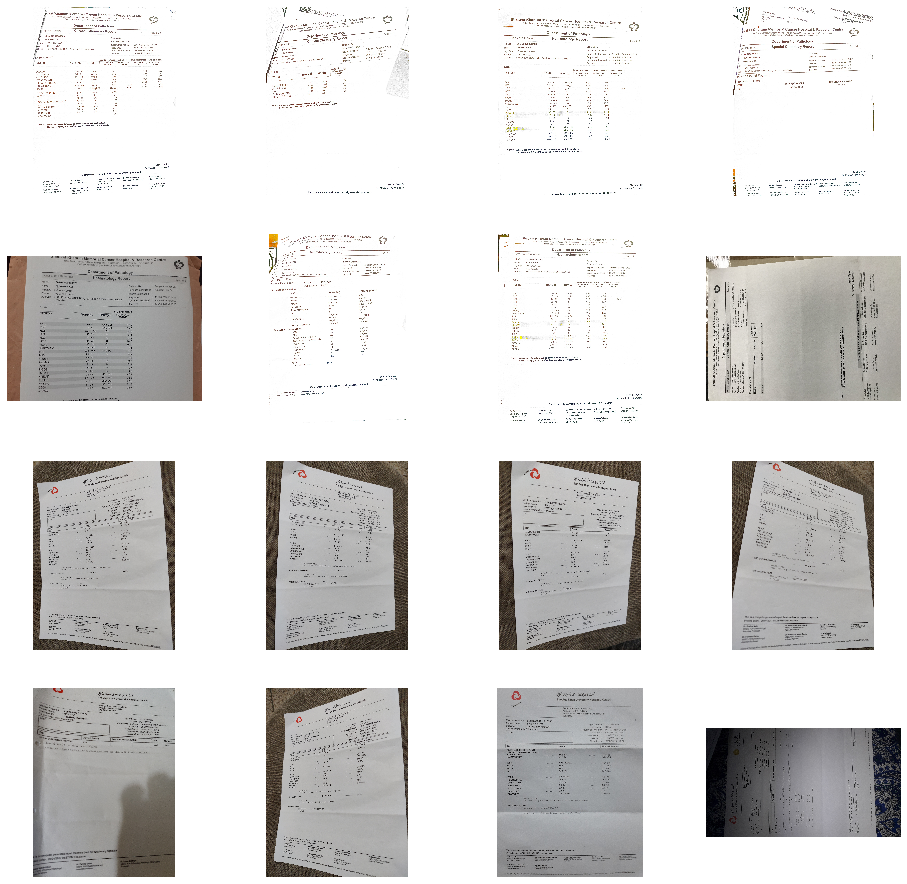

In [12]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_SK_pix = [os.path.join(train_SK_dir, fname) 
                for fname in train_SK_names[pic_index-8:pic_index]]
next_AK_pix = [os.path.join(train_AK_dir, fname) 
                for fname in train_AK_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_SK_pix+next_AK_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
import tensorflow as tf

C:\Users\VIRUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\VIRUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\VIRUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\VIRUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [14]:
# DESIRED_ACCURACY = 0.999

# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc')>DESIRED_ACCURACY):
#             print("\nReached 100% accuracy so cancelling training")
#             self.model.stop_training = True

# callbacks = myCallback()


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'Pic/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,  
      epochs=15,
      verbose=1
#     callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 410s 51s/step - loss: 0.7508 - accuracy: 0.5080
Epoch 2/15
8/8 [==============================] - 410s 51s/step - loss: 0.6340 - accuracy: 0.6110
Epoch 3/15
8/8 [==============================] - 422s 53s/step - loss: 0.4949 - accuracy: 0.8050
Epoch 4/15
8/8 [==============================] - 400s 50s/step - loss: 0.3796 - accuracy: 0.8530
Epoch 5/15
8/8 [==============================] - 398s 50s/step - loss: 0.2502 - accuracy: 0.8990
Epoch 6/15
8/8 [==============================] - 414s 52s/step - loss: 0.1871 - accuracy: 0.9370
Epoch 7/15
8/8 [==============================] - 419s 52s/step - loss: 0.1409 - accuracy: 0.9510
Epoch 8/15
8/8 [==============================] - 408s 51s/step - loss: 0.0910 - accuracy: 0.9660
Epoch 9/15
8/8 [==============================] - 435s 54s/step - loss: 0.0745 - accuracy: 0.9710
Epoch 10/15
8/8 [==============================] - 433s 54s/step - loss: 0.0277 - accuracy: 0.9920
Epoch 11/15
8/8 [==

In [70]:
import numpy as np
from tensorflow.keras.preprocessing import image
 
path = 'Test/img.jpg'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is Shuakat Khanam")
else:
    print(" is Aga Khan")

[0.]
 is Aga Khan


### 